In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
import matplotlib
from matplotlib import font_manager, rc

rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')

In [11]:
busan = pd.read_csv('./부산광역시_지표.csv')
busan

,id,구군,면적(km²),공공체육시설,초등학교,지방세 징수(백만원),의료기관,저소득층(가구),저소득층(인구),세대수,한국인(남),한국인(여),외국인(남),외국인(여),출생(명),사망(명),혼인(건),이혼(건),범죄발생,흉악범죄,폭력범죄,CCTV수,가로등수
0,1,중구,2.83,17,4,"100,363",141,139,280,"23,160","20,557","21,353","1,347",815,112,409,163,91,5553,93,674,376,1740
1,2,서구,13.98,74,11,"73,444",148,672,1281,"52,786","52,627","55,602","1,314",807,386,999,391,227,3979,58,466,376,2779
2,3,동구,9.87,65,7,"119,496",172,532,1129,"44,657","43,327","44,838","1,089","1,223",334,848,369,188,5899,89,781,649,3654
3,4,영도구,14.20,52,14,"63,242",146,667,1289,"54,859","57,629","59,082","1,177",740,346,1158,366,259,3534,54,569,501,3240
4,5,부산진구,29.67,225,32,"343,404",799,1176,2402,"166,865","173,446","184,434","1,275","1,889",1695,2450,1475,684,17066,469,2748,1005,6481
5,6,동래구,16.63,36,22,"227,601",469,784,1530,"112,136","132,295","138,952",427,826,1291,1538,1058,498,8381,137,1193,687,4350
6,7,남구,26.82,74,21,"232,160",355,720,1392,"117,397","134,519","139,961","3,148","3,224",1203,1726,1045,502,8431,138,1046,3171,4486
7,8,북구,39.37,67,27,"130,947",360,1220,2602,"120,273","144,229","146,903","1,220","1,352",1468,1704,1084,538,8106,126,1342,661,5438
8,9,해운대구,51.47,117,32,"449,970",654,1406,2881,"168,650","195,960","210,142","2,539","2,652",1948,2335,1471,724,14386,267,1732,570,11063
9,10,사하구,41.77,59,26,"203,760",416,1366,2859,"138,790","160,101","160,903","2,998","1,949",1526,2093,1337,761,8826,176,1222,1801,6798


In [12]:
busan.columns

Index(['id', '구군', '면적(km²)', '공공체육시설', '초등학교', '지방세 징수(백만원)', '의료기관',
       '저소득층(가구)', '저소득층(인구)', '세대수', '한국인(남)', '한국인(여)', '외국인(남)', '외국인(여)',
       '출생(명)', '사망(명)', '혼인(건)', '이혼(건)', '범죄발생', '흉악범죄', '폭력범죄', 'CCTV수',
       '가로등수'],
      dtype='object')

In [13]:
busan['지방세 징수(백만원)'] = pd.to_numeric(busan['지방세 징수(백만원)'].str.replace(',', ''))
busan['세대수'] = pd.to_numeric(busan['세대수'].str.replace(',', ''))
busan['한국인(남)'] = pd.to_numeric(busan['한국인(남)'].str.replace(',', ''))
busan['한국인(여)'] = pd.to_numeric(busan['한국인(여)'].str.replace(',', ''))
busan['외국인(남)'] = pd.to_numeric(busan['외국인(남)'].str.replace(',', ''))
busan['외국인(여)'] = pd.to_numeric(busan['외국인(여)'].str.replace(',', ''))

In [50]:
busan['인구'] = busan['한국인(남)'] + busan['한국인(여)'] + busan['외국인(남)'] + busan['외국인(여)']
busan['인구/CCTV수'] = busan['인구'] / busan['CCTV수']
busan['면적/CCTV수'] = busan['면적(km²)'] / busan['CCTV수']
busan['인구/가로등수'] = busan['인구'] / busan['가로등수']
busan['면적/가로등수'] = busan['면적(km²)'] / busan['가로등수']
busan['인구/면적'] = busan['인구'] / busan['면적(km²)']
busan['외국인/인구'] = (busan['외국인(남)'] + busan['외국인(여)']) / busan['인구']
busan['저소득층/인구'] = busan['저소득층(인구)'] / busan['인구']
busan['저소득층/세대수'] = busan['저소득층(가구)'] / busan['세대수']
busan['여성/인구'] = (busan['한국인(여)'] + busan['외국인(여)']) / busan['인구']
busan['강력범죄'] = busan['흉악범죄'] + busan['폭력범죄']
busan['범죄/인구'] = busan['범죄발생'] / busan['인구']
busan['강력범죄/범죄'] = busan['강력범죄'] / busan['범죄발생']

In [15]:
busan.columns

Index(['id', '구군', '면적(km²)', '공공체육시설', '초등학교', '지방세 징수(백만원)', '의료기관',
       '저소득층(가구)', '저소득층(인구)', '세대수', '한국인(남)', '한국인(여)', '외국인(남)', '외국인(여)',
       '출생(명)', '사망(명)', '혼인(건)', '이혼(건)', '범죄발생', '흉악범죄', '폭력범죄', 'CCTV수',
       '가로등수', '인구', '인구/CCTV수', '면적/CCTV수', '인구/가로등수', '면적/가로등수', '면적/인구',
       '외국인/인구', '저소득층/인구', '저소득층/세대수', '여성/인구', '강력범죄', '범죄/인구', '강력범죄/범죄'],
      dtype='object')

In [16]:
busan.describe()

,id,면적(km²),공공체육시설,초등학교,지방세 징수(백만원),의료기관,저소득층(가구),저소득층(인구),세대수,한국인(남),한국인(여),외국인(남),외국인(여),출생(명),사망(명),혼인(건),이혼(건),범죄발생,흉악범죄,폭력범죄,CCTV수,가로등수,인구,인구/CCTV수,면적/CCTV수,인구/가로등수,면적/가로등수,면적/인구,외국인/인구,저소득층/인구,저소득층/세대수,여성/인구,강력범죄,범죄/인구,강력범죄/범죄
count,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00
mean,8.50,48.13,90.50,19.00,209659.75,324.00,776.81,1592.50,93619.25,104713.56,108651.50,1792.56,1502.56,1065.56,1391.25,861.25,424.19,8005.81,142.62,1061.56,880.06,6955.25,216660.19,309.23,0.07,39.69,0.01,0.27,0.02,0.01,0.01,0.51,1204.19,0.04,0.15
std,4.76,62.00,59.83,8.29,119312.88,195.06,361.39,758.25,42991.68,50140.62,53109.71,1148.26,876.41,534.39,589.80,394.36,193.51,3510.69,102.55,577.00,715.43,5914.03,103900.26,181.55,0.08,16.85,0.00,0.42,0.01,0.00,0.00,0.01,677.00,0.02,0.03
min,1.00,2.83,17.00,4.00,63242.00,97.00,139.00,280.00,23160.00,20557.00,21353.00,401.00,647.00,112.00,409.00,163.00,91.00,3534.00,54.00,433.00,376.00,1740.00,44072.00,88.57,0.01,5.41,0.00,0.06,0.00,0.00,0.00,0.47,496.00,0.03,0.07
25%,4.75,13.51,51.75,13.25,128084.25,162.25,633.25,1243.00,54577.00,64643.75,61708.50,1155.00,813.00,737.00,994.75,657.25,280.00,5812.50,83.00,647.75,505.50,3835.50,130943.00,157.25,0.02,32.38,0.00,0.08,0.01,0.01,0.01,0.50,731.00,0.03,0.14
50%,8.50,28.25,70.50,21.00,180042.50,330.50,728.50,1461.00,93496.00,105769.50,107975.00,1330.50,1094.00,1205.50,1329.00,830.00,404.50,7884.50,131.50,999.00,623.00,4962.00,216966.00,265.13,0.03,40.15,0.00,0.12,0.02,0.01,0.01,0.51,1139.50,0.04,0.15
75%,12.25,44.20,117.25,23.00,236692.00,374.00,915.00,1869.50,118116.00,136946.50,141696.50,2637.00,2077.75,1453.75,1709.50,1064.50,511.00,8670.00,146.25,1225.75,1031.75,6560.25,284065.00,418.27,0.09,52.22,0.01,0.14,0.02,0.01,0.01,0.51,1394.25,0.04,0.16
max,16.00,218.30,225.00,32.00,462338.00,799.00,1406.00,2881.00,168650.00,195960.00,210142.00,4588.00,3224.00,1948.00,2450.00,1475.00,761.00,17066.00,469.00,2748.00,3171.00,24978.00,411293.00,721.57,0.30,62.64,0.01,1.34,0.05,0.01,0.01,0.53,3217.00,0.13,0.19


In [20]:
def busan_scatter(x_value):
    x_label = x_value
    x = busan[x_label]

    fig = plt.figure(figsize=(14, 8))
    ax = fig.add_subplot(111)
    rects = plt.scatter(x, busan['강력범죄/범죄'], color='#5093FF')

    z = np.polyfit(x, busan['강력범죄/범죄'], 1)
    p = np.poly1d(z)

    plt.plot(x, p(x))

    for i, city in enumerate(busan['구군']):
        ax.annotate(city, ( x[i], busan['강력범죄/범죄'][i]))

    plt.ylabel('강력범죄/범죄')
    plt.xlabel(x_label)
    plt.savefig('./images/scatter_{}.png'.format(x_label.replace('/','_')))
    plt.show()

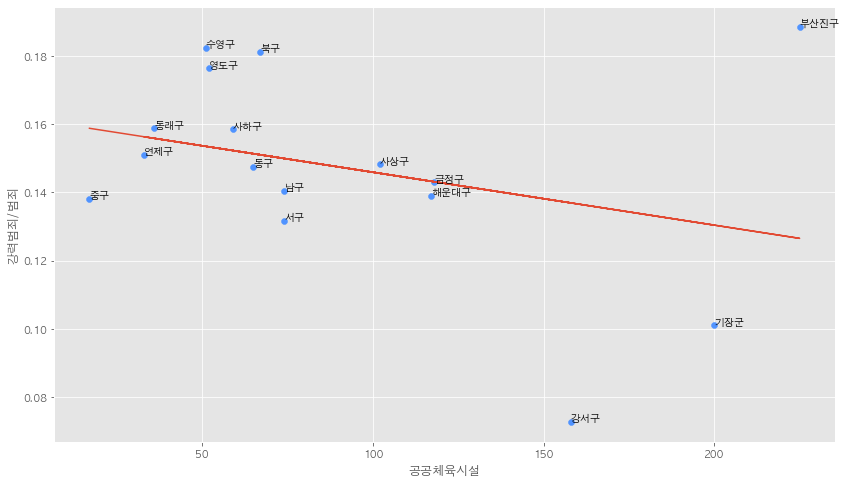

In [23]:
busan_scatter('공공체육시설')

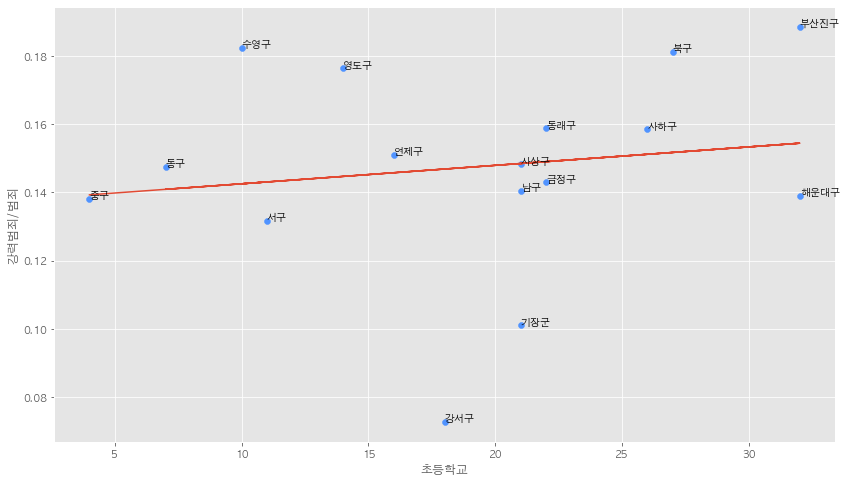

In [24]:
busan_scatter('초등학교')

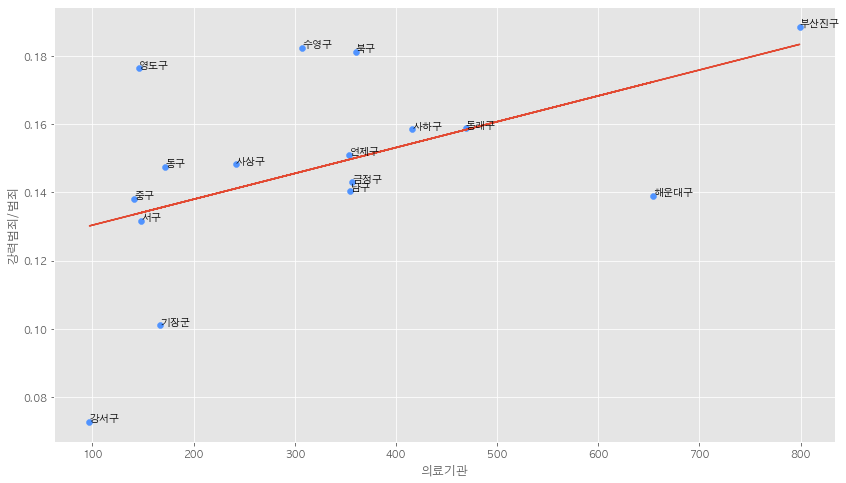

In [25]:
busan_scatter('의료기관')

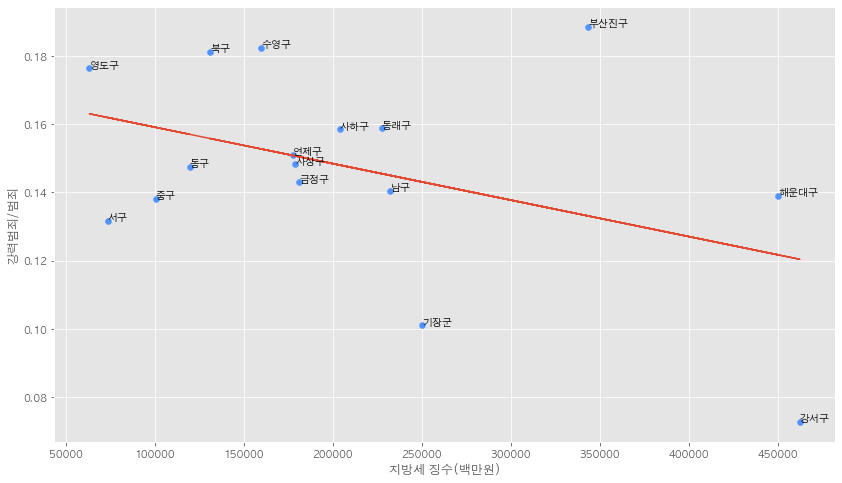

In [26]:
busan_scatter('지방세 징수(백만원)')

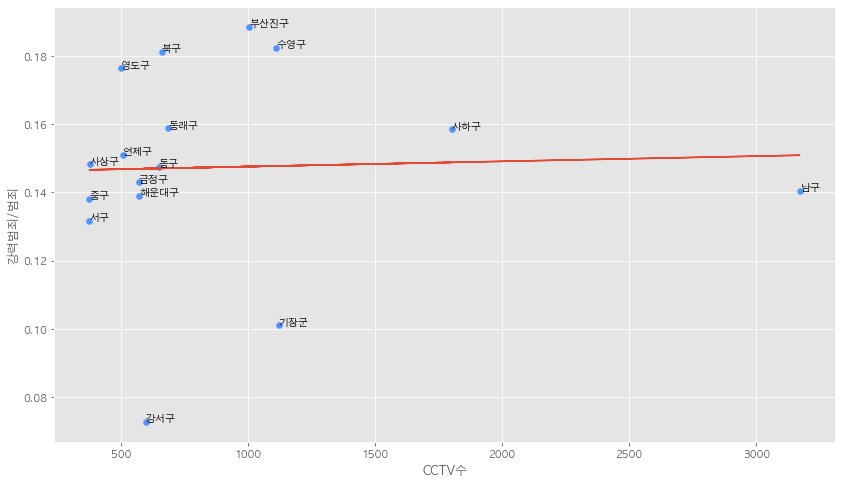

In [27]:
busan_scatter('CCTV수')

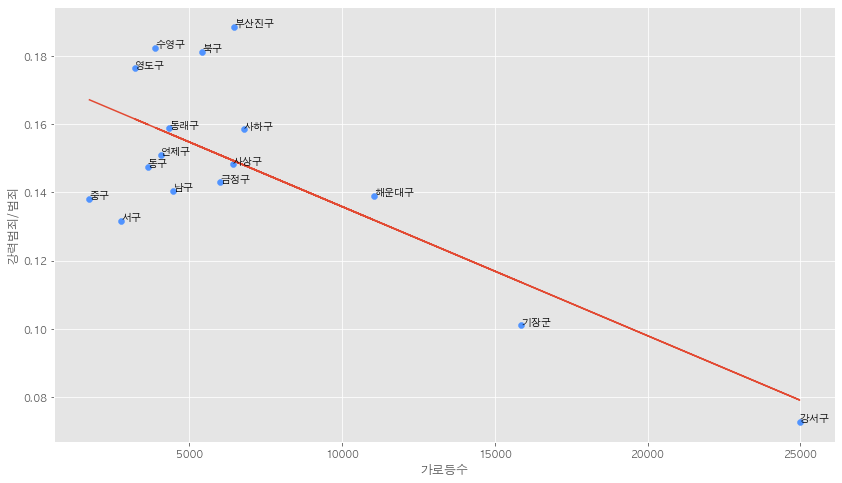

In [28]:
busan_scatter('가로등수')

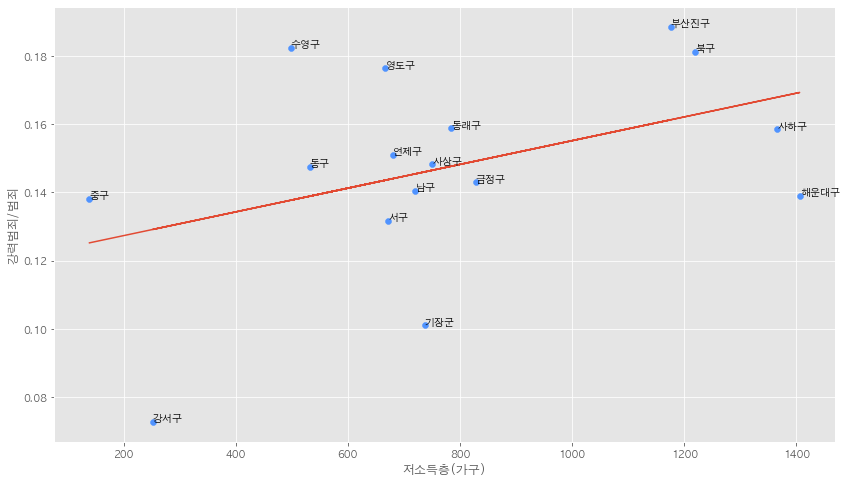

In [29]:
busan_scatter('저소득층(가구)')

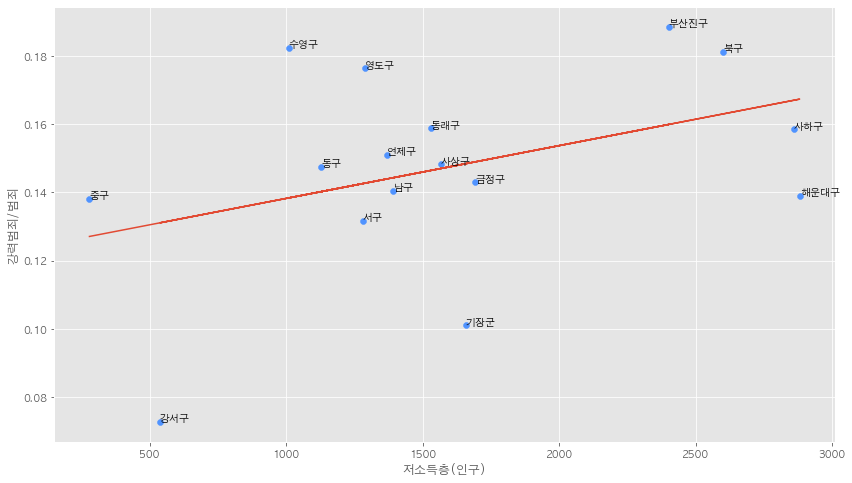

In [31]:
busan_scatter('저소득층(인구)')

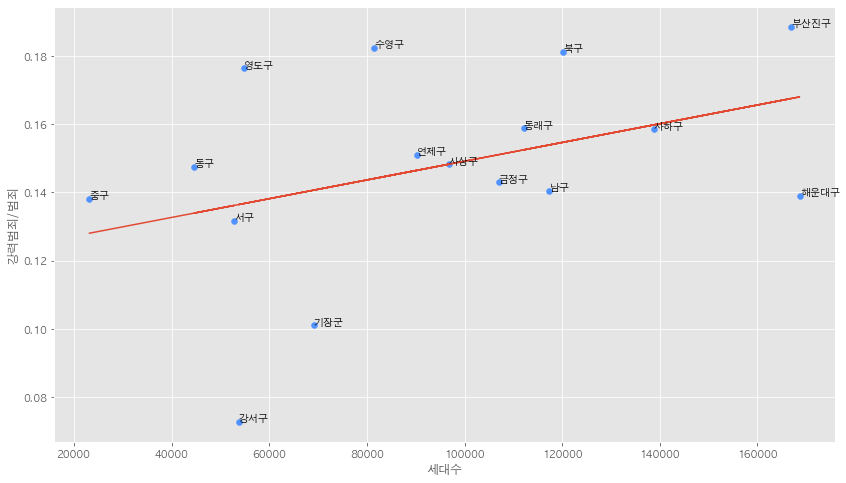

In [32]:
busan_scatter('세대수')

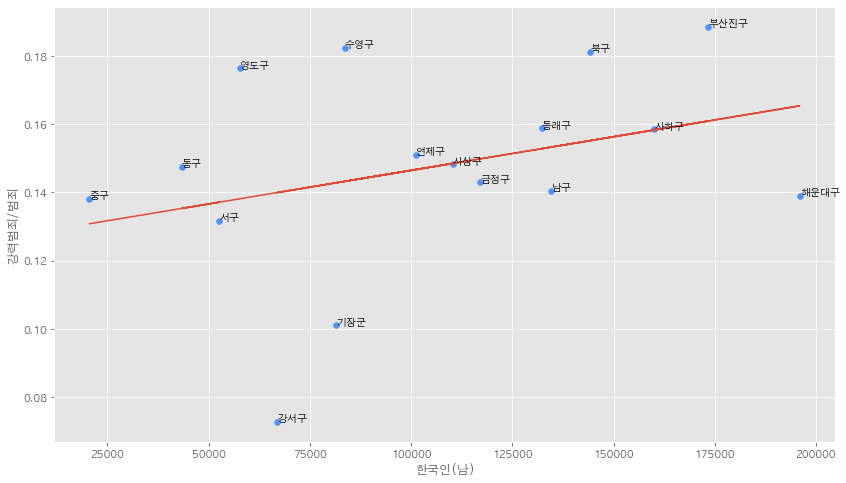

In [33]:
busan_scatter('한국인(남)')

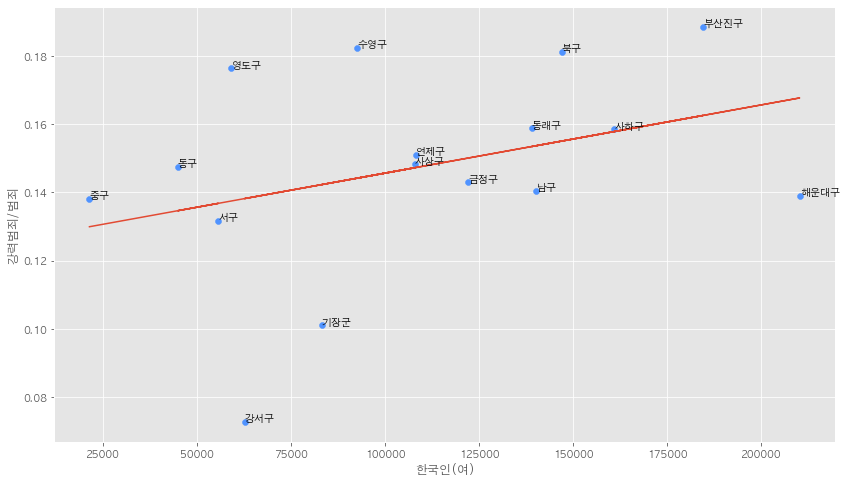

In [34]:
busan_scatter('한국인(여)')

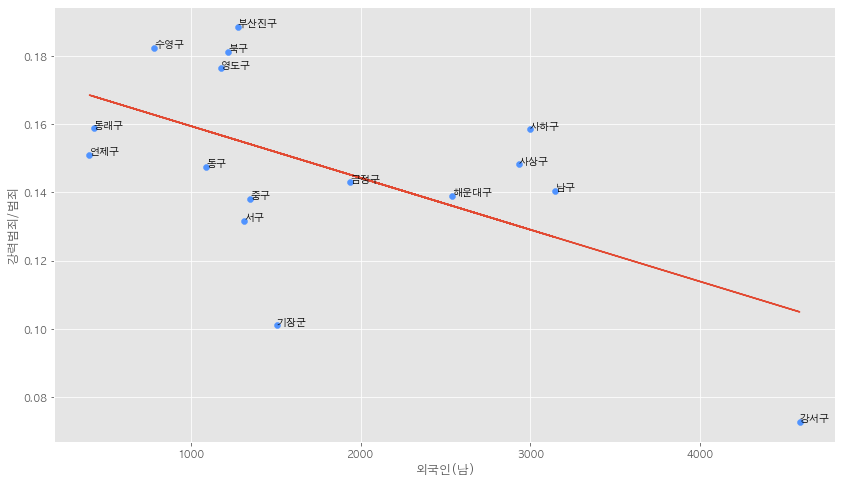

In [35]:
busan_scatter('외국인(남)')

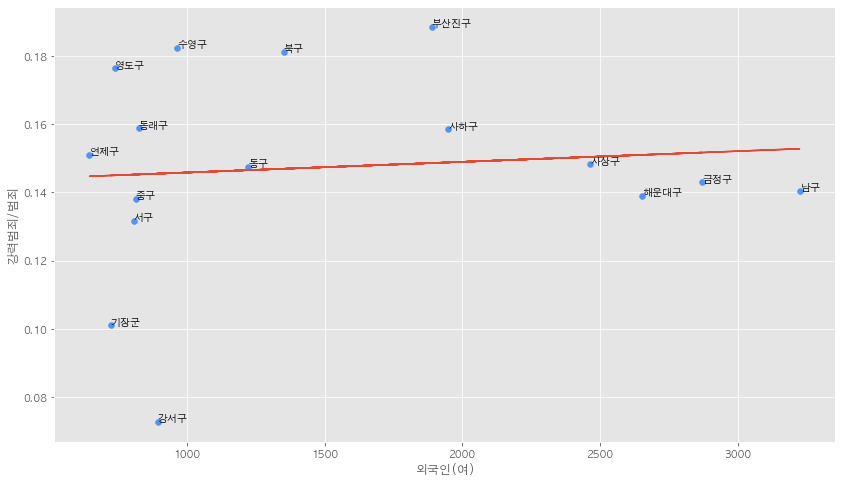

In [36]:
busan_scatter('외국인(여)')

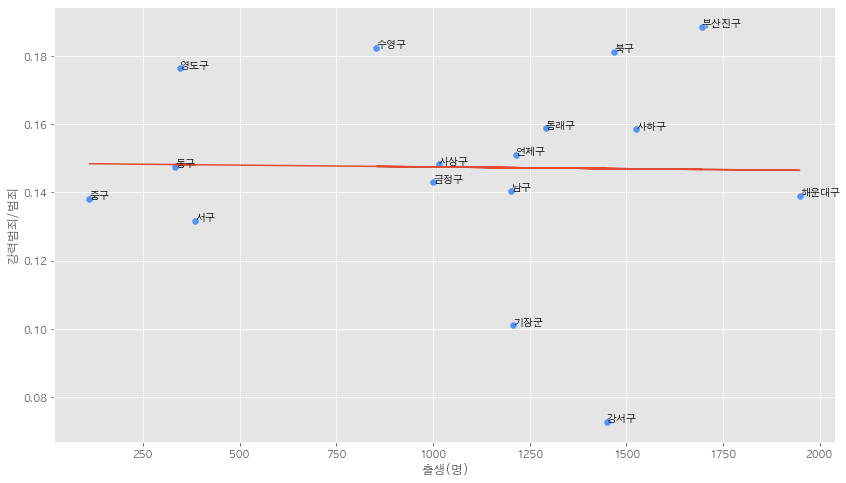

In [37]:
busan_scatter('출생(명)')

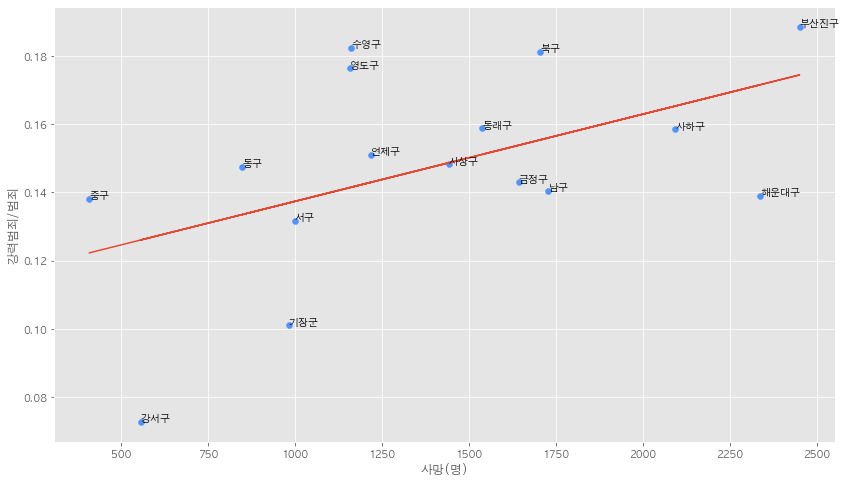

In [38]:
busan_scatter('사망(명)')

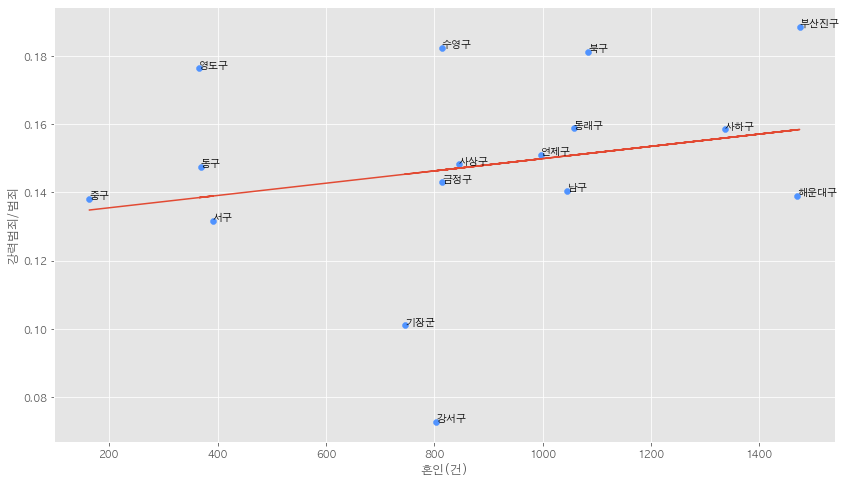

In [39]:
busan_scatter('혼인(건)')

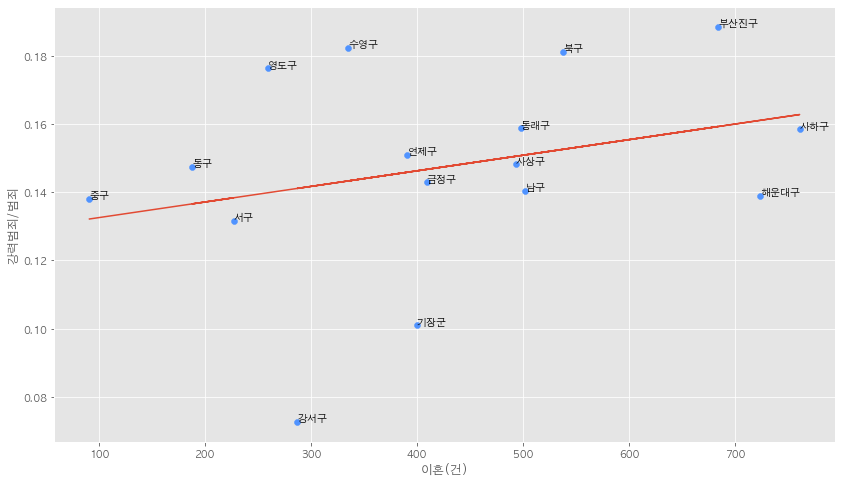

In [40]:
busan_scatter('이혼(건)')

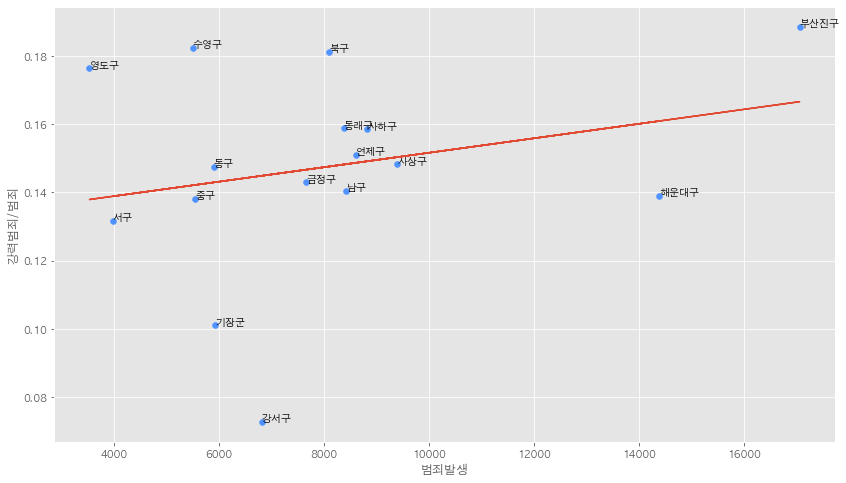

In [41]:
busan_scatter('범죄발생')

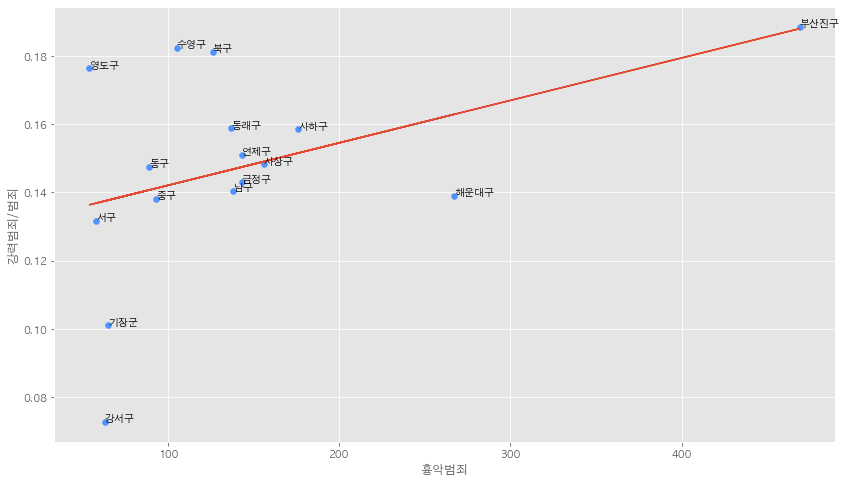

In [42]:
busan_scatter('흉악범죄')

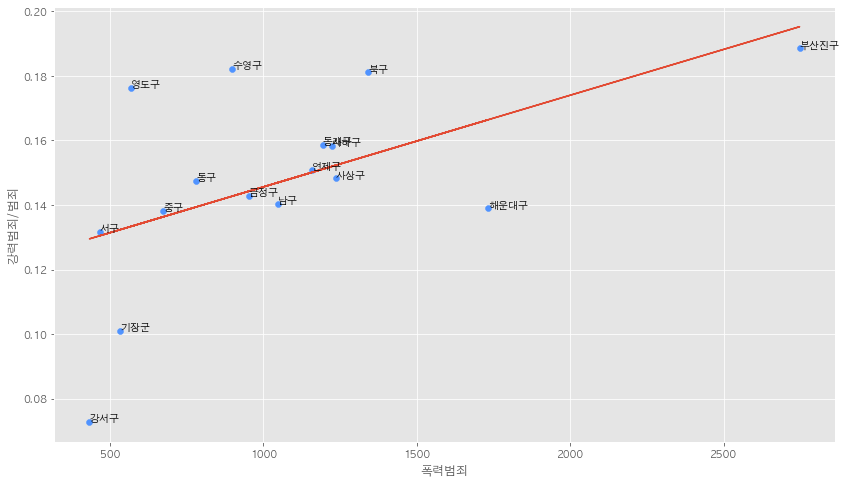

In [43]:
busan_scatter('폭력범죄')

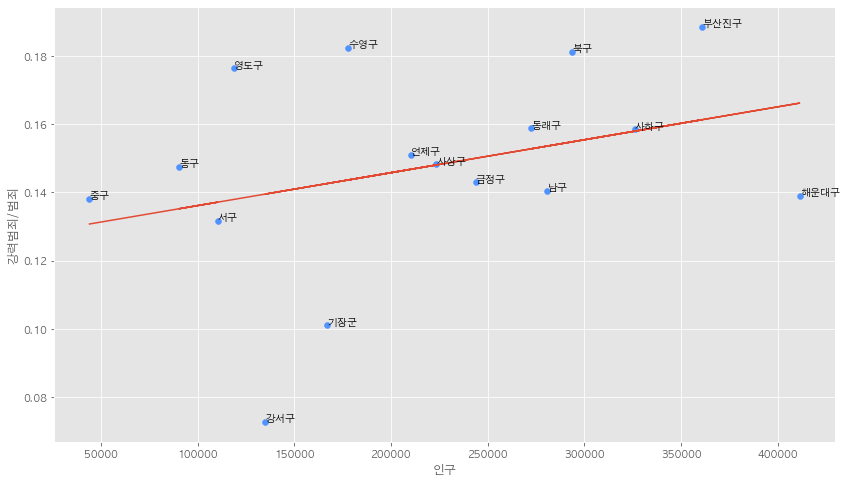

In [44]:
busan_scatter('인구')

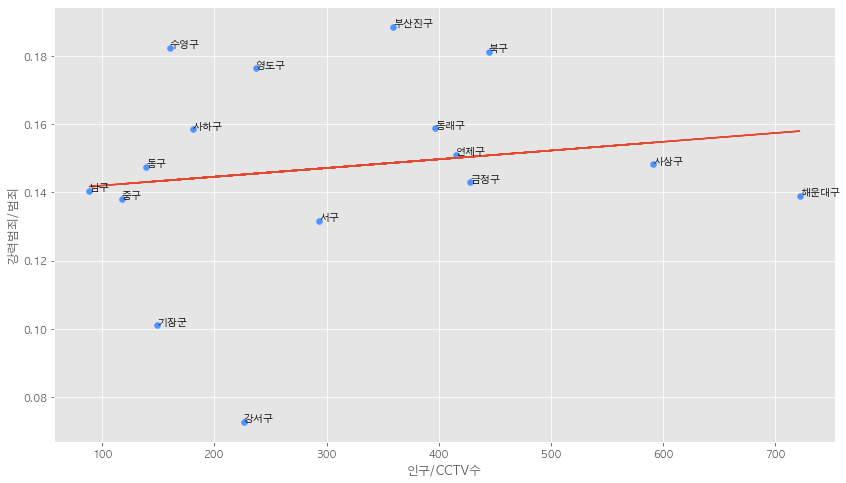

In [45]:
busan_scatter('인구/CCTV수')

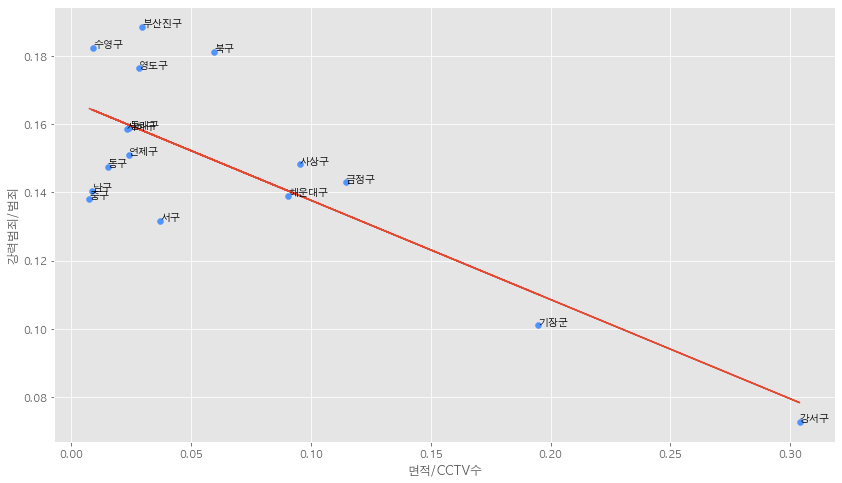

In [46]:
busan_scatter('면적/CCTV수')

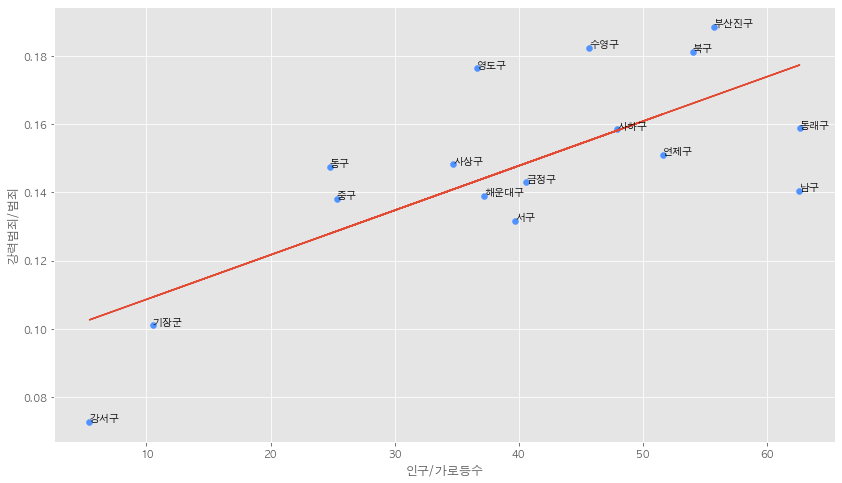

In [47]:
busan_scatter('인구/가로등수')

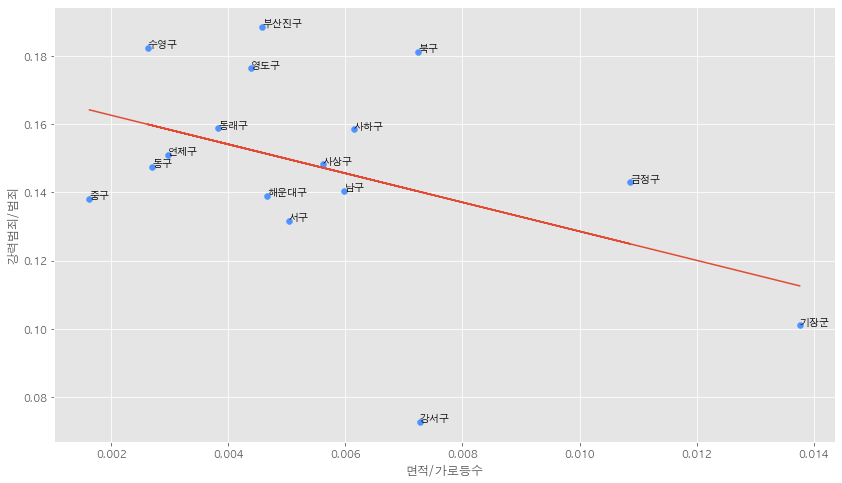

In [48]:
busan_scatter('면적/가로등수')

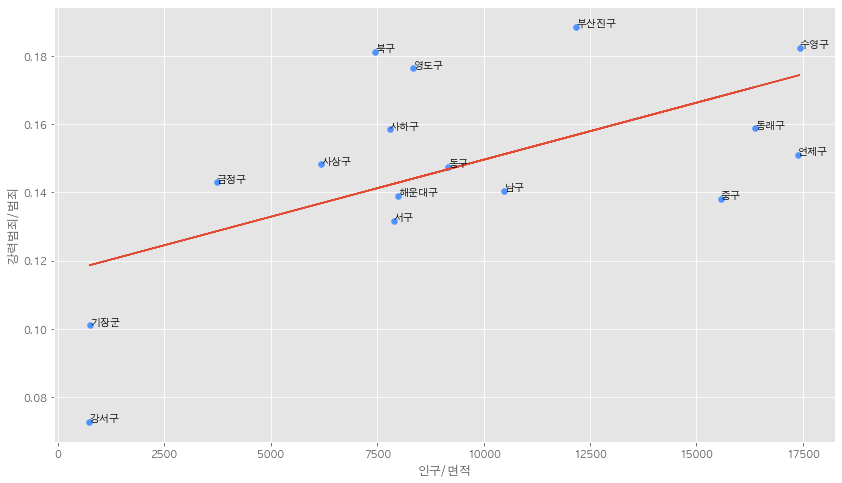

In [51]:
busan_scatter('인구/면적')

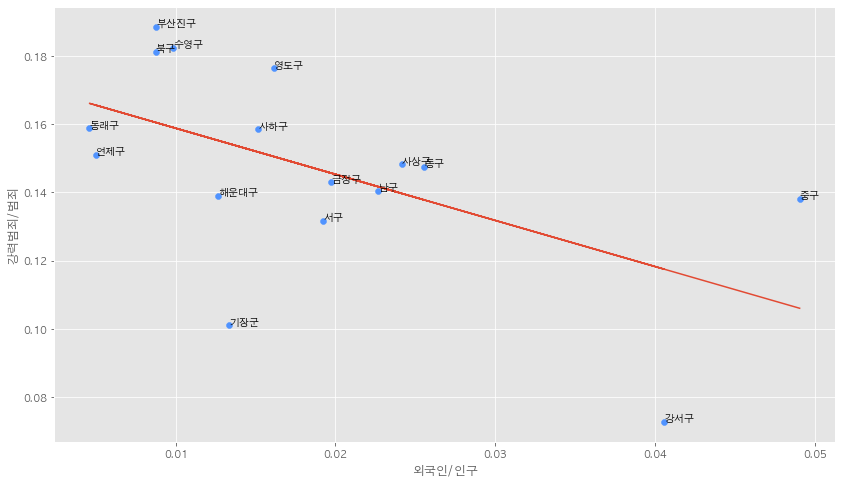

In [52]:
busan_scatter('외국인/인구')

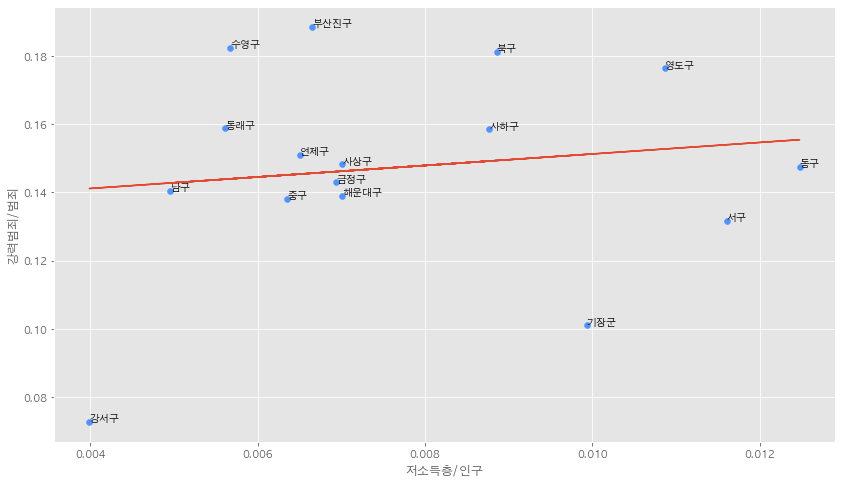

In [53]:
busan_scatter('저소득층/인구')

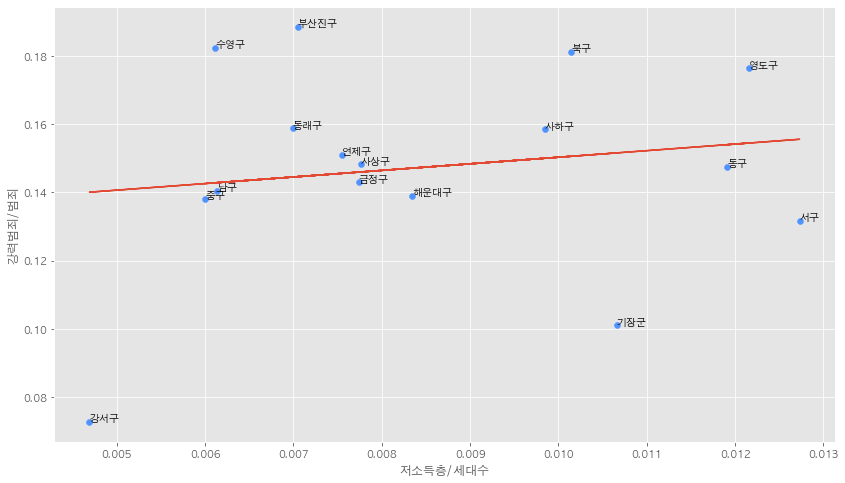

In [54]:
busan_scatter('저소득층/세대수')

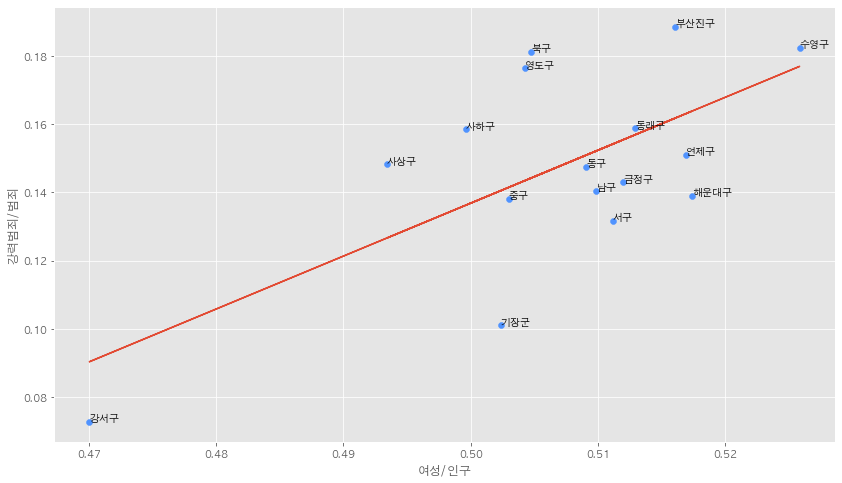

In [55]:
busan_scatter('여성/인구')

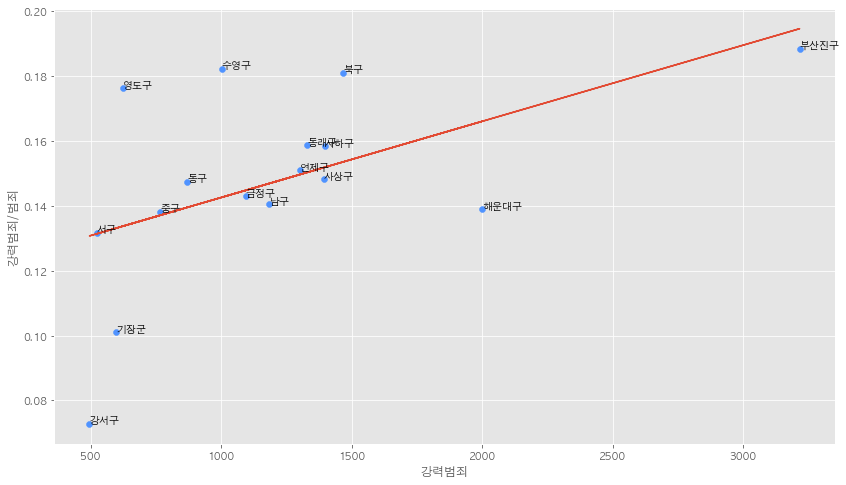

In [56]:
busan_scatter('강력범죄')

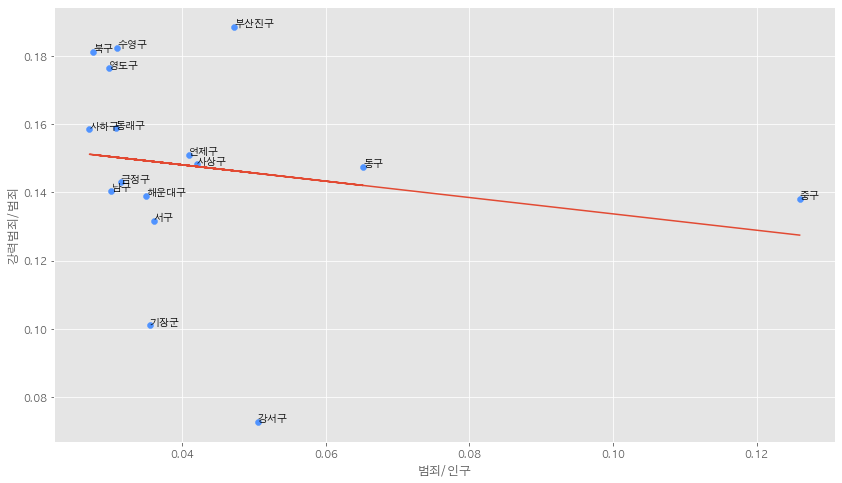

In [57]:
busan_scatter('범죄/인구')

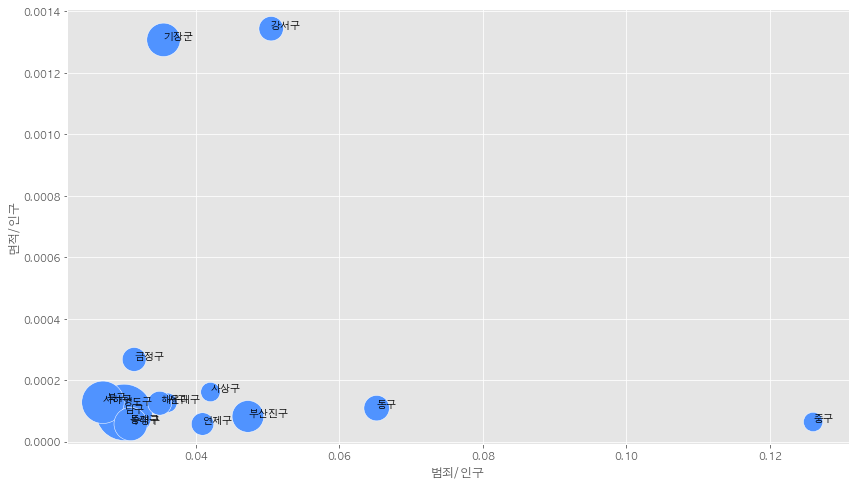

In [43]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
rects = plt.scatter(busan['범죄/인구'], busan['면적/인구'], color='#5093FF', s=busan['CCTV수'], edgecolors="white")

for i, city in enumerate(busan['군구']):
    ax.annotate(city, ( busan['범죄/인구'][i], busan['면적/인구'][i]))
    
plt.ylabel('면적/인구')
plt.xlabel('범죄/인구')
plt.show()